<a href="https://colab.research.google.com/github/Diwakarmogarala/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview of my project
This project is about Cardiovascular disease. Initially I want to find the most common disease in US so that I can work on it. So on using the dataset https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD I came to know that Cardiovascular disease is the most commonly affected in US next to cancer. Here I want to prepare heart diseased patients with stroke disease. So I used following datasets. Here I want to see the etiological pattern and cost charging for those diseased people and also I want to prepare my dataset for a machine learning model, so I would like to do data processing and balance the data if there is any imbalance in my target column using imblearn module.


### About datasets.

#### https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD
CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources

#### https://data.world/cms/heart-attack-payment-hospital
The dataset is about the payment for heart attack patients measure–provider data. This data set includes provider data for payments associated with a 30-day episode of care for heart attack patients.

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [1]:
# Importing all the packages and modules that I am going to use in this project.
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.wkt import loads
from imblearn.under_sampling import RandomUnderSampler

In [2]:
def json_import(url = ''):
  import json
  import requests
  text = requests.get(url)
  with open('data.json','w') as info:
    info.write(text.text)
  disease_json = json.load(open('data.json'))
  column_list = []
  for each_column in disease_json['meta']['view']['columns']:
    column_list.append(each_column['fieldName'].replace(':','').strip())
  disease = pd.DataFrame(disease_json['data'], columns=column_list)
  return disease

In [3]:
disease = json_import('https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD')

In [4]:
pd.options.display.max_columns=50
disease.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,geolocation,responseid,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
0,row-nazc.ye5n~eubq,00000000-0000-0000-2B56-4922780F3411,0,1675079585,None,1675079681,None,{ },2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,916,916,None,None,None,None,Gender,Male,None,None,None,None,POINT (-92.27449074299966 34.74865012400045),None,05,AST,AST3_1,NMBR,GENDER,GENM,None,None,None,None
1,row-idyy_bbyg.a6f8,00000000-0000-0000-8072-CA0CACFA7316,0,1675079585,None,1675079681,None,{ },2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,2227,2227,None,None,None,None,Overall,Overall,None,None,None,None,POINT (-106.13361092099967 38.843840757000464),None,08,AST,AST3_1,NMBR,OVERALL,OVR,None,None,None,None
2,row-5aze_ijyw_wxw7,00000000-0000-0000-1849-0D82E305FFD4,0,1675079585,None,1675079681,None,{ },2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,708,708,None,None,None,None,Overall,Overall,None,None,None,None,POINT (-77.036871 38.907192),None,11,AST,AST3_1,NMBR,OVERALL,OVR,None,None,None,None
3,row-fkj3.se4f.kcix,00000000-0000-0000-9E3F-CD3362718287,0,1675079585,None,1675079681,None,{ },2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,3520,3520,None,None,None,None,Gender,Female,None,None,None,None,POINT (-83.62758034599966 32.83968109300048),None,13,AST,AST3_1,NMBR,GENDER,GENF,None,None,None,None
4,row-8e7i_7mk6~rn8b,00000000-0000-0000-C7DD-D4F65C81A8BE,0,1675079585,None,1675079684,None,{ },2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,123,123,None,None,None,None,Race/Ethnicity,Hispanic,None,None,None,None,POINT (-84.71439026999968 44.6613195430005),None,26,AST,AST3_1,NMBR,RACE,HIS,None,None,None,None


<Axes: >

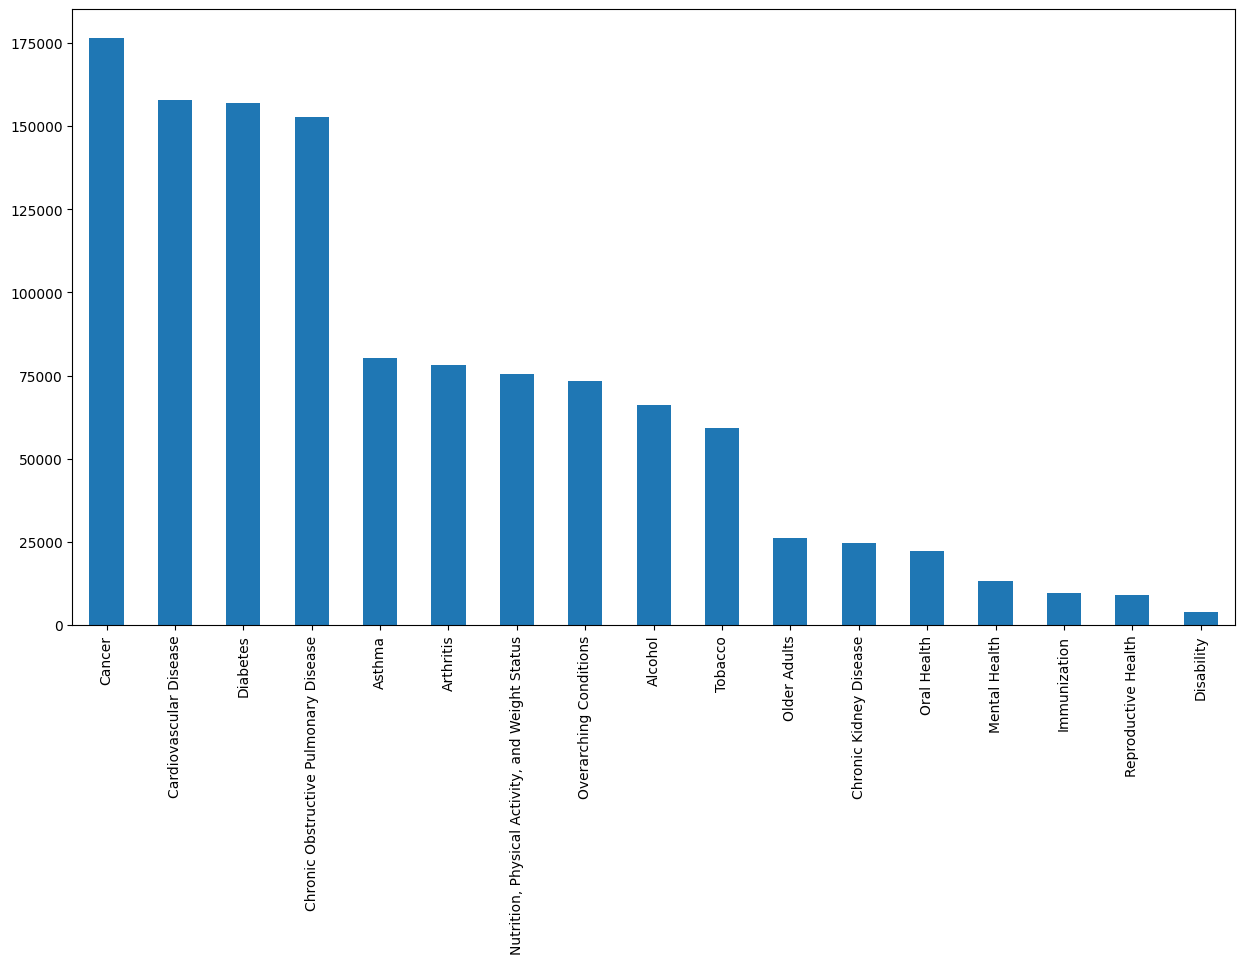

In [5]:
disease.topic.value_counts().plot(kind = 'bar', figsize=(15,8))

<Axes: xlabel='yearstart'>

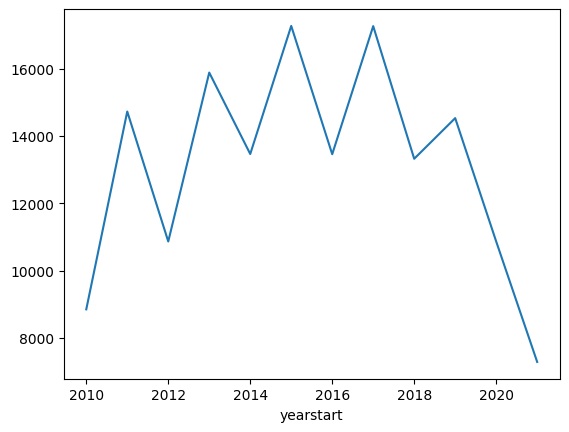

In [6]:
cvd = disease[['yearstart','topic']].pivot_table(index = 'yearstart', columns = 'topic', values = 'yearstart', aggfunc= 'value_counts')
cvd['Cardiovascular Disease'].plot()

In [7]:
heart_disease = disease[disease['topic'] == 'Cardiovascular Disease']

<ipython-input-8-b4a5ed2e0604>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-8-b4a5ed2e0604>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease['geometry'] = heart_disease['geolocation'].apply(lambda geo: loads(geo) if not pd.isna(geo) else None)
<ipython-input-8-b4a5ed2e0604>:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.

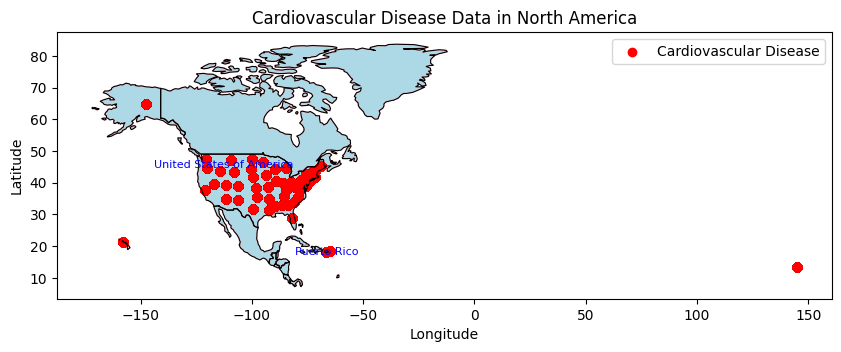

In [8]:
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads
import matplotlib.pyplot as plt

# Load the natural earth dataset
geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for North America
geo_earth = geo_earth[geo_earth['continent'] == 'North America']

# Convert 'GeoLocation' to Shapely Point geometries
heart_disease['geometry'] = heart_disease['geolocation'].apply(lambda geo: loads(geo) if not pd.isna(geo) else None)

# Convert to GeoDataFrame
cvd_geo = gpd.GeoDataFrame(heart_disease, geometry='geometry')

# Set CRS for cvd_geo (assuming it's the same as geo_earth)
cvd_geo = cvd_geo.set_crs(geo_earth.crs)

# Plotting the base map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot North America map
geo_earth.plot(ax=ax, color='lightblue', edgecolor='pink', label='North America')

# Plot the cardiovascular disease data
cvd_geo.plot(ax=ax, color='red', label='Cardiovascular Disease')

# Plot state boundaries
geo_earth.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Mark each state where cardiovascular disease points are located
for idx, state in geo_earth.iterrows():
    state_name = state['name']
    state_boundary = state['geometry']

    # Check if there are cardiovascular disease points in the state
    points_in_state = cvd_geo[cvd_geo.intersects(state_boundary)]

    if not points_in_state.empty:
        # Get the centroid of the state boundary
        centroid = state_boundary.centroid

        # Plot a marker at the centroid with the state name
        ax.annotate(state_name, (centroid.x, centroid.y), color='blue', fontsize=8, ha='center', va='center')

# Title and labels
ax.set_title('Cardiovascular Disease Data in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [9]:
heart_disease_nulldata = dict(heart_disease.isnull().sum())
for column,count in heart_disease_nulldata.items():
  if heart_disease_nulldata[column] == 157750:
    del heart_disease[column]

In [10]:
heart_disease

,sid,id,position,created_at,updated_at,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,geometry
132,row-4e24-btec_dc2a,00000000-0000-0000-6467-EA4D1682BA18,0,1675079585,1675079742,{ },2016,2016,ID,Idaho,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,36,36,None,None,None,None,Race/Ethnicity,Hispanic,POINT (-114.3637300419997 43.682630005000476),16,CVD,CVD1_4,NMBR,RACE,HIS,POINT (-114.3637300419997 43.682630005000476)
133,row-5ddj.tw87~92se,00000000-0000-0000-4D60-5B8F2B7E7D8F,0,1675079585,1675079742,{ },2012,2012,MA,Massachusetts,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,2671,2671,None,None,None,None,Gender,Male,POINT (-72.08269067499964 42.27687047000046),25,CVD,CVD1_4,NMBR,GENDER,GENM,POINT (-72.08269067499964 42.27687047000046)
134,row-huec~vizz~gi7c,00000000-0000-0000-548B-89B0A68F3589,0,1675079585,1675079742,{ },2014,2014,MD,Maryland,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,2048,2048,None,None,None,None,Gender,Female,POINT (-76.60926011099963 39.29058096400047),24,CVD,CVD1_4,NMBR,GENDER,GENF,POINT (-76.60926011099963 39.29058096400047)
135,row-vgxp~3u4m.vmre,00000000-0000-0000-6792-0420970CF90B,0,1675079585,1675079742,{ },2014,2014,MS,Mississippi,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,2397,2397,None,None,None,None,Gender,Female,POINT (-89.53803082499968 32.745510099000455),28,CVD,CVD1_4,NMBR,GENDER,GENF,POINT (-89.53803082499968 32.745510099000455)
136,row-9yj7~nzh8.yudt,00000000-0000-0000-C112-26DEEA0E6F1F,0,1675079585,1675079742,{ },2011,2011,SD,South Dakota,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,432,432,None,None,None,None,Gender,Male,POINT (-100.3735306369997 44.353130053000484),46,CVD,CVD1_4,NMBR,GENDER,GENM,POINT (-100.3735306369997 44.353130053000484)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185476,row-dqph~p2ym~42am,00000000-0000-0000-E042-578153FD080D,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD10_2,AGEADJPREV,RACE,MRC,POINT (-108.10983035299967 43.23554134300048)
1185477,row-jhwe~3w2i_n4jk,00000000-0000-0000-6641-96C7E0F8FB83,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD9_1,AGEADJPREV,RACE,HIS,POINT (-108.10983035299967 43.23554134300048)
1185528,row-azw6_pkye_68kt,00000000-0000-0000-949E-BDAF1290F1AD,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD10_2,CRDPREV,RACE,HIS,POINT (-108.10983035299967 43.23554134300048)
1185637,row-sxrd_urh8.vxz7,00000000-0000-0000-0A8E-C3C2139A5BBC,0,1675080398,1675080639,{ },2020,2020,WY,Wyoming,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD,CVD9_2,CRDPREV,RACE,HIS,POINT (-108.1098

<Axes: xlabel='yearstart'>

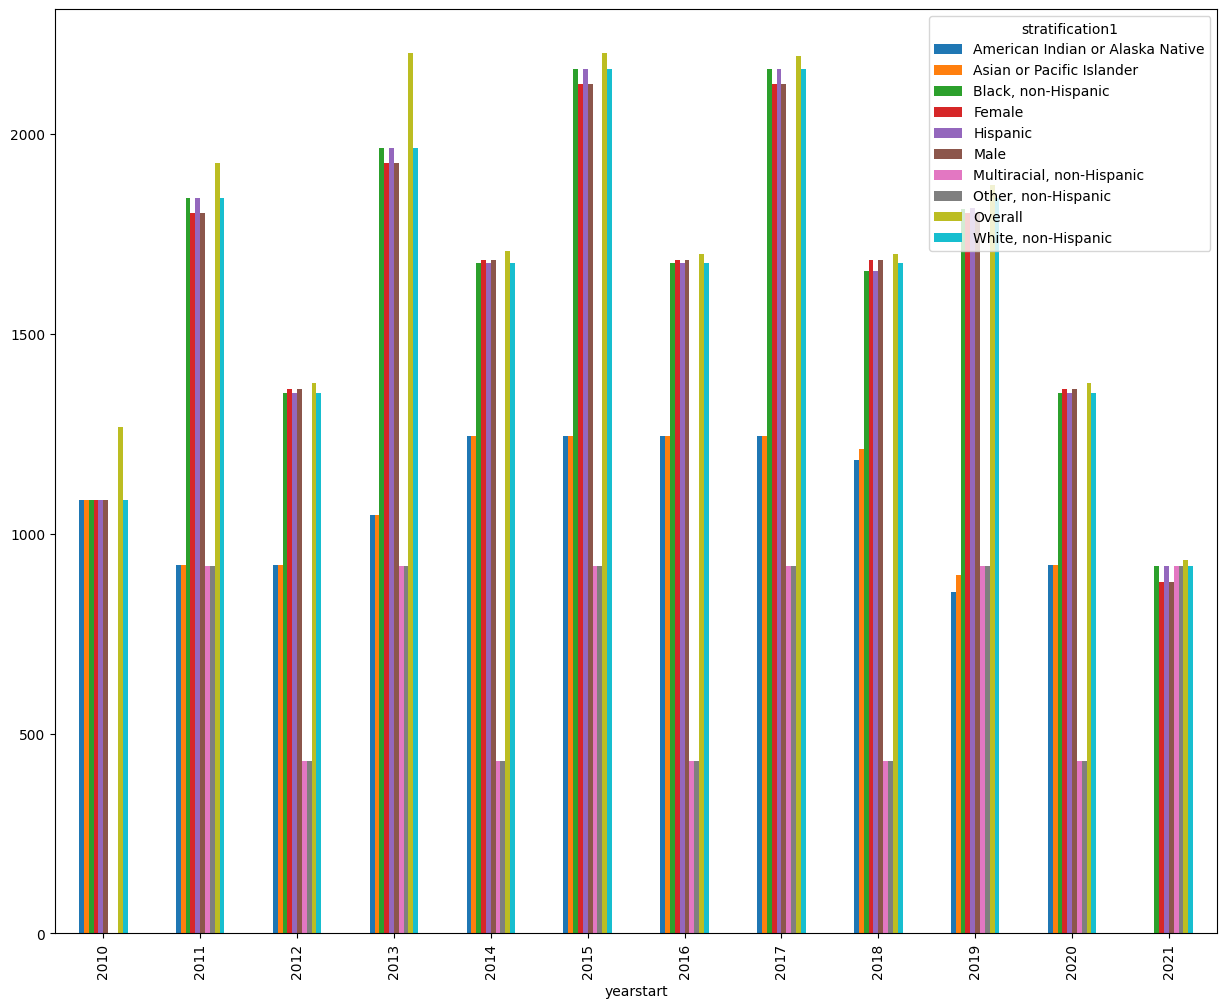

In [11]:
cvd_stratify = heart_disease[['yearstart','stratification1']].pivot_table(index = 'yearstart', columns = 'stratification1', values = 'stratification1', aggfunc= 'value_counts')
cvd_stratify.plot(kind = 'bar', figsize = (15,12))

https://data.world/cms/heart-attack-payment-hospital

In [13]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [14]:
heart = pd.read_csv('https://query.data.world/s/ohawsmy5ofjjn2mtchfe5j7mclfijt?dws=00000')

In [15]:
heart = heart[heart['Payment measure name']=='Payment for heart attack patients']
heart.head()

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,Payment category,Denominator,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,PAYM_30_AMI,No Different than the National Average Payment,53,$23171.00,"$20,404","$26,226",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart attack patients,PAYM_30_AMI,Number of Cases Too Small,Not Available,NaN,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"
6,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Payment for heart attack patients,PAYM_30_AMI,Less than the National Average Payment,186,$20007.00,"$18,418","$21,732",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and lower payment,NaN,07/01/2012,06/30/2015,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL 35801\n"
9,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,9072123675,Payment for heart attack patients,PAYM_30_AMI,No Different than the National Average Payment,318,$24309.00,"$22,554","$26,252",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"BOX 196604\nANCHORAGE, AK 99508\n"
12,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Payment for heart attack patients,PAYM_30_AMI,Number of Cases Too Small,Not Available,NaN,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"PO BOX 287\nBETHEL, AK 99559\n"


In [16]:
heart['Lower estimate'] = heart['Lower estimate'].str.replace('$','')
heart['Lower estimate'] = heart['Lower estimate'].str.replace(',','')
heart['Lower estimate'] = heart['Lower estimate'].str.replace('Not Available','')
heart['Lower estimate'] = pd.to_numeric(heart['Lower estimate'])
heart['Higher estimate'] = heart['Higher estimate'].str.replace('$','')
heart['Higher estimate'] = heart['Higher estimate'].str.replace(',','')
heart['Higher estimate'] = heart['Higher estimate'].str.replace('Not Available','')
heart['Higher estimate'] = pd.to_numeric(heart['Higher estimate'])

heart['Payment'] = heart['Payment'].str.replace('$','')
heart['Payment'] = heart['Payment'].str.replace(',','')
heart['Payment'] = heart['Payment'].str.replace('Not Available','')
heart['Payment'] = pd.to_numeric(heart['Payment'])

<ipython-input-16-26494ccf999d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Lower estimate'] = heart['Lower estimate'].str.replace('$','')
<ipython-input-16-26494ccf999d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Higher estimate'] = heart['Higher estimate'].str.replace('$','')
<ipython-input-16-26494ccf999d>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Payment'] = heart['Payment'].str.replace('$','')


In [17]:
heart.columns

Index(['Provider ID', 'Hospital name', 'Address', 'City', 'State', 'ZIP Code',
       'County name', 'Phone number', 'Payment measure name',
       'Payment measure ID', 'Payment category', 'Denominator', 'Payment',
       'Lower estimate', 'Higher estimate', 'Payment footnote',
       'Value of care display name', 'Value of care display ID',
       'Value of care category', 'Value of care footnote',
       'Measure start date', 'Measure End Date', 'Location'],
      dtype='object')

In [18]:
heart_graph = heart[['Lower estimate', 'Payment', 'Higher estimate','State']]
heart_graph

,Lower estimate,Payment,Higher estimate,State
0,20404.0,23171.0,26226.0,AL
3,NaN,NaN,NaN,AL
6,18418.0,20007.0,21732.0,AL
9,22554.0,24309.0,26252.0,AK
12,NaN,NaN,NaN,AK
...,...,...,...,...
14443,19758.0,22231.0,25067.0,TX
14444,NaN,NaN,NaN,WI
14448,21786.0,23587.0,25644.0,TX
14449,NaN,NaN,NaN,TX


<Axes: xlabel='State'>

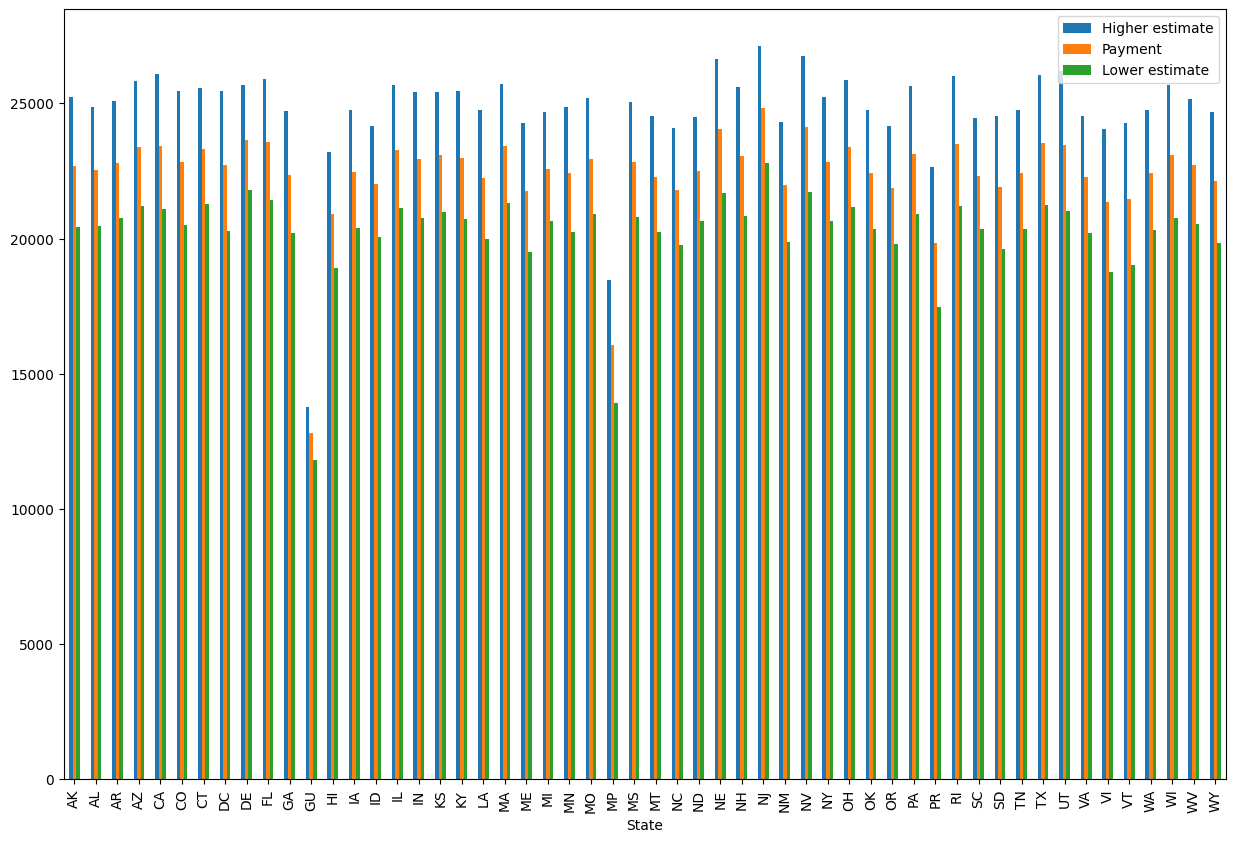

In [50]:
heart_graph_LE = heart_graph.pivot_table(index = 'State')
heart_graph_LE = heart_graph_LE[['Higher estimate', 'Payment', 'Lower estimate']]
heart_graph_LE.plot(kind = 'bar', figsize=(15,10))

In [20]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [21]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
del stroke['id']

In [23]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
stroke = stroke.rename(str.title, axis = 'columns')

In [25]:
stroke.columns = ['Sex', 'Age', 'Hypertension', 'HeartDisease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'Bmi',
       'Smoking_Status', 'Stroke']

In [26]:
heart_htn = heart[heart['RestingBP'] >=140]
heart_htn['Hypertension'] = 1
heart_no_htn = heart[heart['RestingBP'] <140]
heart_no_htn['Hypertension'] = 0
dataframe =[heart_no_htn,heart_htn]

heart = pd.concat(dataframe,axis=0)

<ipython-input-26-02c539576618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_htn['Hypertension'] = 1
<ipython-input-26-02c539576618>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_no_htn['Hypertension'] = 0


In [27]:
heart['Sex'] = heart['Sex'].replace('M','Male')
heart['Sex'] = heart['Sex'].replace('F','Female')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,Female,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
5,39,Male,NAP,120,339,0,Normal,170,N,0.0,Up,0,0
6,45,Female,ATA,130,237,0,Normal,170,N,0.0,Up,0,0
7,54,Male,ATA,110,208,0,Normal,142,N,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,67,Male,NAP,152,212,0,LVH,150,N,0.8,Flat,1,1
908,63,Male,ASY,140,187,0,LVH,144,Y,4.0,Up,1,1
911,59,Male,ASY,164,176,1,LVH,90,N,1.0,Flat,1,1
912,57,Female,ASY,140,241,0,Normal,123,Y,0.2,Flat,1,1


In [28]:
merged = heart.merge(stroke,on = ['Age', 'Sex', 'HeartDisease', 'Hypertension'], how = 'inner')
merged

<ipython-input-28-b2d5c54645b6>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged = heart.merge(stroke,on = ['Age', 'Sex', 'HeartDisease', 'Hypertension'], how = 'inner')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0,0,No,Private,Urban,67.39,35.6,Unknown,0
1,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0,0,Yes,Self-employed,Urban,160.00,31.9,formerly smoked,0
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0,0,Yes,Private,Rural,78.42,29.9,never smoked,0
3,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0,0,Yes,Private,Rural,74.58,31.6,Unknown,0
4,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0,0,No,Private,Urban,67.53,49.5,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,64,Male,TA,170,227,0,LVH,155,N,0.6,Flat,0,1,Yes,Private,Urban,57.42,28.0,smokes,0
9971,64,Male,TA,170,227,0,LVH,155,N,0.6,Flat,0,1,Yes,Private,Urban,81.68,31.3,formerly smoked,0
9972,64,Male,TA,170,227,0,LVH,155,N,0.6,Flat,0,1,Yes,Self-employed,Rural,85.66,28.5,never smoked,0
9973,64,Male,TA,170,227,0,LVH,155,N,0.6,Flat,0,1,Yes,Private,Rural,196.26,34.5,Unknown,0


In [29]:
merged.duplicated().sum()

0

In [30]:
merged.duplicated().sum()

0

In [31]:
merged.isnull().sum()

Age                    0
Sex                    0
ChestPainType          0
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG             0
MaxHR                  0
ExerciseAngina         0
Oldpeak                0
ST_Slope               0
HeartDisease           0
Hypertension           0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
Bmi                  404
Smoking_Status         0
Stroke                 0
dtype: int64

In [32]:
merged = merged.dropna()

In [33]:
merged.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status',
       'Stroke'],
      dtype='object')

In [34]:
merged.Stroke.value_counts()

0    9195
1     376
Name: Stroke, dtype: int64

In [35]:
!pip install imblearn

In [36]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler()
x= merged[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status']]
y = merged['Stroke']
x_rus, y_rus = RUS.fit_resample(x,y)
columns = [x_rus,y_rus]
merged = pd.concat(columns, axis = 1)
merged

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,59,Male,NAP,130,318,0,Normal,120,Y,1.0,Flat,0,0,Yes,Self-employed,Urban,86.46,30.5,Unknown,0
1,53,Male,ASY,126,0,0,Normal,106,N,0.0,Flat,1,0,Yes,Govt_job,Urban,77.30,33.4,never smoked,0
2,47,Female,NAP,130,235,0,Normal,145,N,2.0,Flat,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0
3,37,Female,NAP,130,211,0,Normal,142,N,0.0,Up,0,0,No,Govt_job,Rural,77.37,21.4,never smoked,0
4,48,Male,ATA,100,159,0,Normal,100,N,0.0,Up,0,0,Yes,Private,Rural,106.74,33.7,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,66,Female,TA,150,226,0,Normal,114,N,2.6,Down,0,1,Yes,Govt_job,Rural,116.55,31.1,formerly smoked,1
748,66,Female,NAP,146,278,0,LVH,152,N,0.0,Flat,0,1,Yes,Govt_job,Rural,116.55,31.1,formerly smoked,1
749,67,Female,NAP,152,277,0,Normal,172,N,0.0,Up,0,1,Yes,Self-employed,Rural,61.94,25.3,smokes,1
750,67,Female,NAP,152,277,0,Normal,172,N,0.0,Up,0,1,Yes,Private,Rural,179.12,28.1,formerly smoked,1


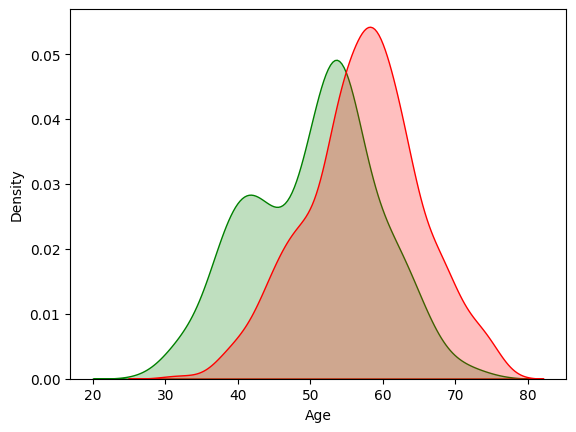

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
non_stroke_age = merged[merged["Stroke"]==0]
stroke_age = merged[merged["Stroke"]==1]
sns.kdeplot(non_stroke_age['Age'], fill=True, color = 'g')
sns.kdeplot(stroke_age['Age'], fill=True, color = 'r')
plt.show()

In [47]:
merged.isnull().sum()

Age                  0
Sex                  0
ChestPainType        0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
ST_Slope             0
HeartDisease         0
Hypertension         0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
Bmi                  0
Smoking_Status       0
Stroke               0
dtype: int64

In [48]:
merged.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,59,Male,NAP,130,318,0,Normal,120,Y,1.0,Flat,0,0,Yes,Self-employed,Urban,86.46,30.5,Unknown,0
1,53,Male,ASY,126,0,0,Normal,106,N,0.0,Flat,1,0,Yes,Govt_job,Urban,77.30,33.4,never smoked,0
2,47,Female,NAP,130,235,0,Normal,145,N,2.0,Flat,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0
3,37,Female,NAP,130,211,0,Normal,142,N,0.0,Up,0,0,No,Govt_job,Rural,77.37,21.4,never smoked,0
4,48,Male,ATA,100,159,0,Normal,100,N,0.0,Up,0,0,Yes,Private,Rural,106.74,33.7,formerly smoked,0


In [ ]:
col = ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope','Ever_Married', 'Work_Type','Residence_Type', 'Smoking_Status']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for column in col:
  merged[column] = le.fit_transform(merged[column]).astype(int)

In [ ]:
sns.pairplot(merged)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
RFC = RandomForestClassifier()
x= merged[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status']]
y = merged['Stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state=48)
RFC.fit(x_train,y_train)
y_predict = RFC.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)